# Support Vector Machine

### What is a *Hyperplane*?

In a $k$-dimensional space, a [hyperplane](https://en.wikipedia.org/wiki/Hyperplane) is a flat affine subspace of dimension $k-1$. For instance, in two dimensions, a hyperplane is a flat one-dimensional subspace - in other words, a line. In three dimensions, a hyperplane is a flat two-dimensional subspace - that is, a plane. In $k>3$ dimensions, it can be hard to visualize a hyperplane, but the notion of a $(k-1)$ -dimensional flat subspace still applies.

The mathematical definition of a hyperplane is quite simple. In two dimensions, a hyperplane is defined by the equation

$$
\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}=0
$$

for parameters $\beta_{0}, \beta_{1}$, and $\beta_{2}$. When we say that the above equation "defines" the hyperplane, we mean that any $X=\left(X_{1}, X_{2}\right)^{\prime}$ for which the equation holds is a point on the hyperplane. Note this equation is simply the equation of a line, since indeed in two dimensions a hyperplane is a line.

Clearly in th multidimensional case one has

$$
\begin{aligned}
\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}+\ldots+\beta_{k} X_{k}&=0\\
\mathbf{x}^{\prime}\boldsymbol{\beta}&=0,
\end{aligned}
$$

and this defines a $k$-dimensional hyperplane in the sense that if $X=[X_1,X_2,\ldots,X_k]^{\prime}\in\mathbb{R}^{k}$ satisfies $\mathbf{x}^{\prime}\boldsymbol{\beta}=0$, then it is said that $X$ *lies* on the hyperplane.

Now, suppose that $X$ does not satisfy $\mathbf{x}^{\prime}\boldsymbol{\beta}=0$ rather,
$$
\begin{aligned}
\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}+\ldots+\beta_{k} X_{k}&>0\\
\mathbf{x}^{\prime}\boldsymbol{\beta}&>0.
\end{aligned}
$$

Then this tells us that $X$ lies to one side of the hyperplane. 

On the other hand, if
$$
\begin{aligned}
\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}+\ldots+\beta_{k} X_{k}&<0\\
\mathbf{x}^{\prime}\boldsymbol{\beta}&<0.
\end{aligned}
$$
then $X$ lies on the other side of the hyperplane. So we can think of the hyperplane as dividing p-dimensional space into two halves. One can easily determine on which side of the hyperplane a point lies by simply calculating the sign of the left hand side of $\mathbf{x}^{\prime}\boldsymbol{\beta}$.

<div>
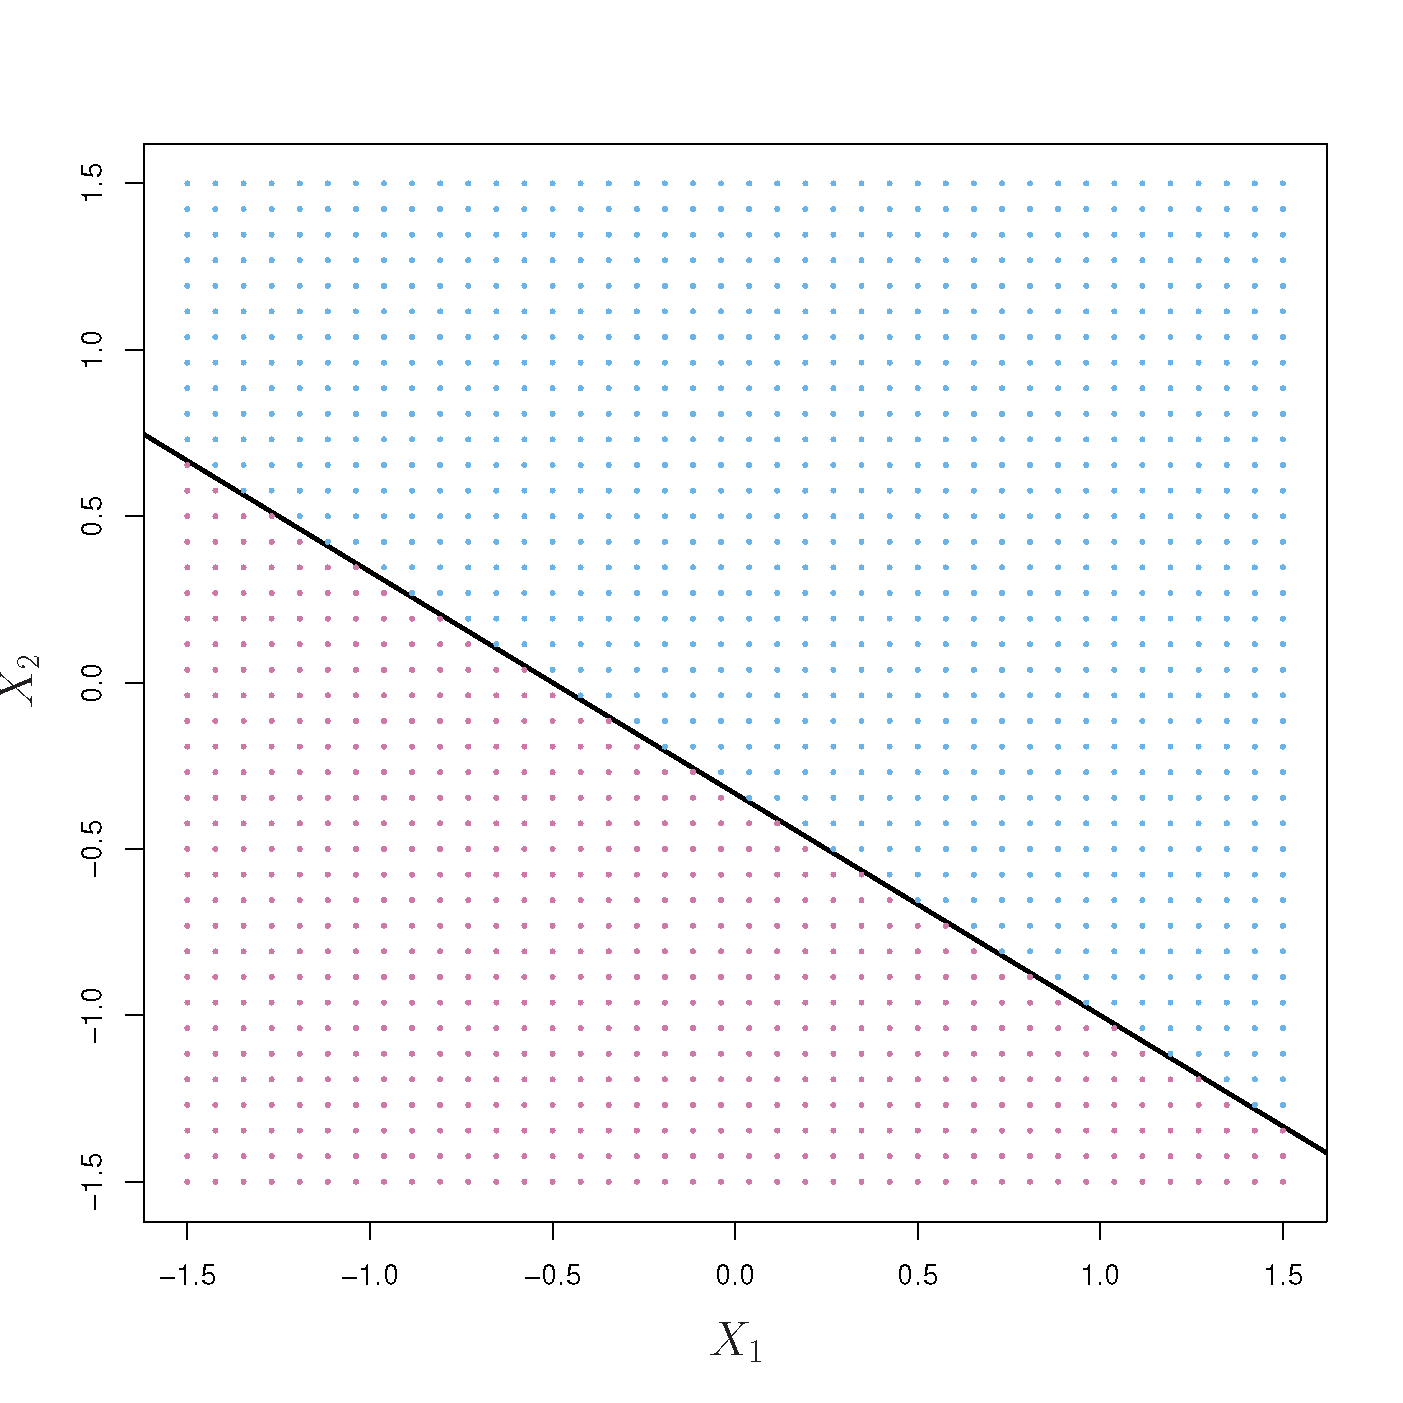
</div>
👆🏼 The hyperplane $1+2 X_{1}+3 X_{2}=0$ is shown. The blue region is
the set of points for which $1+2 X_{1}+3 X_{2}>0$, and the purple region is the set of
points for which $1+2 X_{1}+3 X_{2}<0$.

In [ ]:
## installing the 'wooldridge' package if not previously installed
if (!require(wooldridge)) install.packages('wooldridge')

data(mroz)

##  Obs:   753

##  1. inlf                     =1 if in labor force, 1975
##  2. hours                    hours worked, 1975
##  3. kidslt6                  # kids < 6 years
##  4. kidsge6                  # kids 6-18
##  5. age                      woman's age in yrs
##  6. educ                     years of schooling
##  7. wage                     estimated wage from earns., hours
##  8. repwage                  reported wage at interview in 1976
##  9. hushrs                   hours worked by husband, 1975
## 10. husage                   husband's age
## 11. huseduc                  husband's years of schooling
## 12. huswage                  husband's hourly wage, 1975
## 13. faminc                   family income, 1975
## 14. mtr                      fed. marginal tax rate facing woman
## 15. motheduc                 mother's years of schooling
## 16. fatheduc                 father's years of schooling
## 17. unem                     unem. rate in county of resid.
## 18. city                     =1 if live in SMSA (Standard Metropolitan Statistical Area)
## 19. exper                    actual labor mkt exper
## 20. nwifeinc                 (faminc - wage*hours)/1000
## 21. lwage                    log(wage)
## 22. expersq                  exper^2

In [ ]:
## specifying the outcome variable (y) and original predictors (X)
outcome <- "inlf"
predictors <- c("kidslt6", "kidsge6", "age", "educ","exper", "hushrs", "husage", "huseduc","huswage", 
    "nwifeinc","mtr","unem","city")

## creating local copy with relevant variables
data("mroz", package = "wooldridge")
mroz.copy <- subset(mroz, select = c(outcome, predictors))
mroz.copy$inlf <- as.factor(mroz.copy$inlf)

head(mroz.copy,10)

In [ ]:
## installing the 'tidyverse' package if not previously installed
if (!require(tidyverse)) install.packages('tidyverse')

## installing the 'caret' package if not previously installed
if (!require(caret)) install.packages('caret')

## split the data into training and test set
set.seed(2020)
training.samples <- mroz.copy$inlf %>% 
  createDataPartition(p = 0.75, list = FALSE)
train.data  <- mroz.copy[training.samples, ]
test.data <- mroz.copy[-training.samples, ]

In [ ]:
set.seed(2020)
model <- train(inlf~.,data=train.data,method="svmLinear",
              trControl=trainControl("cv",number=10),
              preProcess=c("center","scale")
              )

In [ ]:
predicted.classes <- model %>% predict(test.data)
## assessing model accuracy
confusionMatrix(data = factor(test.data$inlf,labels=c("no","yes")),
                reference = factor(predicted.classes,labels=c("no","yes")))

In [ ]:
set.seed(2020)
model <- train(inlf~.,data=train.data,method="svmLinear",
              trControl=trainControl("cv",number=10),
              tuneGrid=expand.grid(C=seq(0,2,length=20)),
              preProcess=c("center","scale")
              )
plot(model)
model$bestTune

In [ ]:
predicted.classes <- model %>% predict(test.data)
## assessing model accuracy
confusionMatrix(data = factor(test.data$inlf,labels=c("no","yes")),
                reference = factor(predicted.classes,labels=c("no","yes")))

In [ ]:
set.seed(24)
model <- train(inlf~.,data=train.data,method="svmRadial",
              trControl=trainControl("cv",number=10),
              preProcess=c("center","scale"),
              tuneLength=10
              )
model$bestTune
predicted.classes <- model %>% predict(test.data)
## assessing model accuracy
confusionMatrix(data = factor(test.data$inlf,labels=c("no","yes")),
                reference = factor(predicted.classes,labels=c("no","yes")))

In [ ]:
set.seed(2020)
model <- train(inlf~.,data=train.data,method="svmPoly",
              trControl=trainControl("cv",number=10),
              preProcess=c("center","scale"),
              tuneLength=4
              )
model$bestTune
predicted.classes <- model %>% predict(test.data)
## assessing model accuracy
confusionMatrix(data = factor(test.data$inlf,labels=c("no","yes")),
                reference = factor(predicted.classes,labels=c("no","yes")))